In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing

In [9]:
from sklearn import datasets

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.metrics import roc_curve


In [12]:
from sklearn.model_selection import train_test_split
from sklearn import utils

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [14]:
dataset=pd.read_csv("Two_points_KNN.csv")

In [15]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,2].values

In [16]:
x

array([[  9.43446606,  -2.57200001],
       [  3.36864566, -10.19467054],
       [  1.34140667,  -4.20414019],
       ...,
       [ -1.39359829,  -7.876754  ],
       [ -7.70897181,  -4.29800246],
       [  4.6107791 ,  10.62947734]])

In [17]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [18]:
dataset.head()

,-2.543456253616113,-10.81635752298698,0
0,9.434466,-2.572000,0
1,3.368646,-10.194671,0
2,1.341407,-4.204140,0
3,9.547758,-2.220580,0
4,-3.533291,6.424351,0


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
predictions=knn.predict(x_test)

In [22]:
confusion_matrix(y_test,predictions)

array([[253,   0],
       [  0, 247]], dtype=int64)

In [23]:
knn.score(x_test,y_test)
precision_score(y_test,predictions)
recall_score(y_test, predictions)
f1_score(y_test, predictions)

1.0

In [24]:
y_pred_prob = knn.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


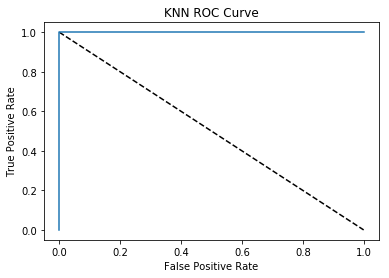

In [25]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()